<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [4]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-4-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [5]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [6]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y= data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}#  l2 ridge
"""
Since the lbfgs solver is only compatible with l2, I will add another solver that is compatible with l1(Lasso).
parameters = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':[0.01,0.1,1]},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C':[0.01,0.1,1]}
]
I will use these parameters to have gridsearch explore all valid combinations later after analysis with default parameters is done.
I will also add more parameter options to C values since the gridsearch currently being implemented only checks 3 C values while keeping penalty and solver constant
"""
lr=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring='accuracy')
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hyperparameters :(best parameters found) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters found)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
logReg_score=logreg_cv.score(X_test, Y_test)
logReg_score

0.8333333333333334

Lets look at the confusion matrix:


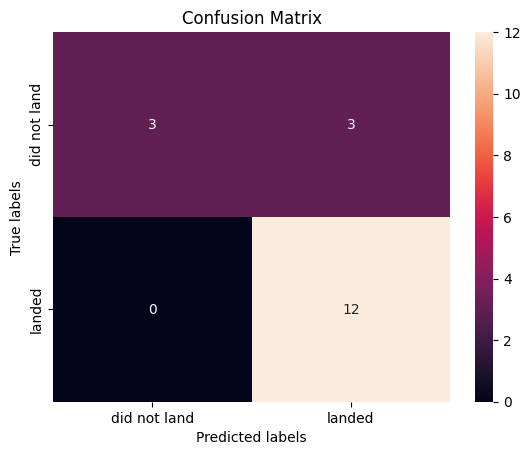

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5), #Will test more paras later
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10, scoring='accuracy')

In [19]:
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='accuracy')

In [20]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
svm_score=svm_cv.score(X_test, Y_test)
print(svm_score)

0.8333333333333334


We can plot the confusion matrix


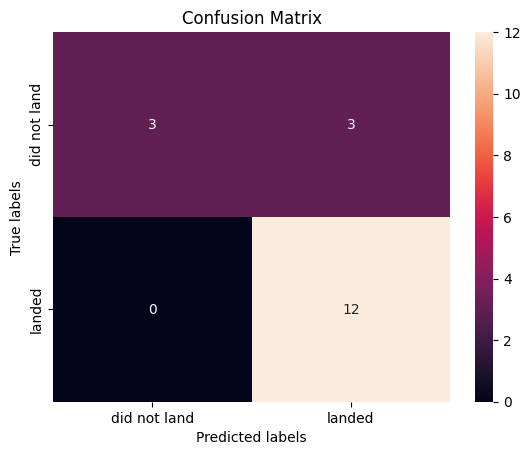

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state=42)
tree_cv=GridSearchCV(tree, param_grid=parameters, cv=10, scoring='accuracy')

In [24]:
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
tree_score=tree_cv.score(X_test, Y_test)
tree_score

0.9444444444444444

We can plot the confusion matrix


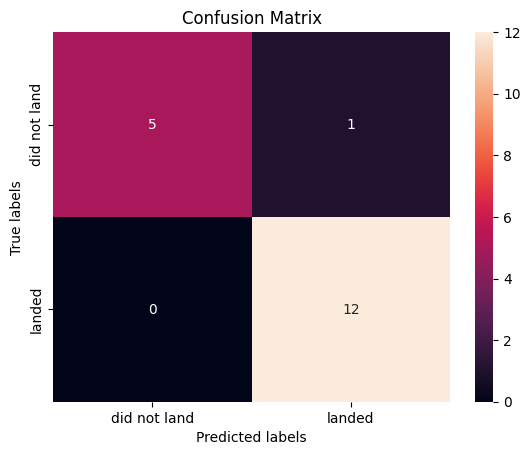

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=10, scoring='accuracy')

In [29]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [30]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [31]:
knn_score=knn_cv.score(X_test, Y_test)
knn_score

0.8333333333333334

We can plot the confusion matrix


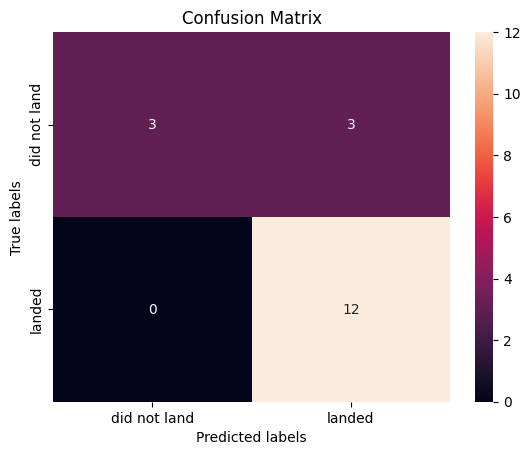

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


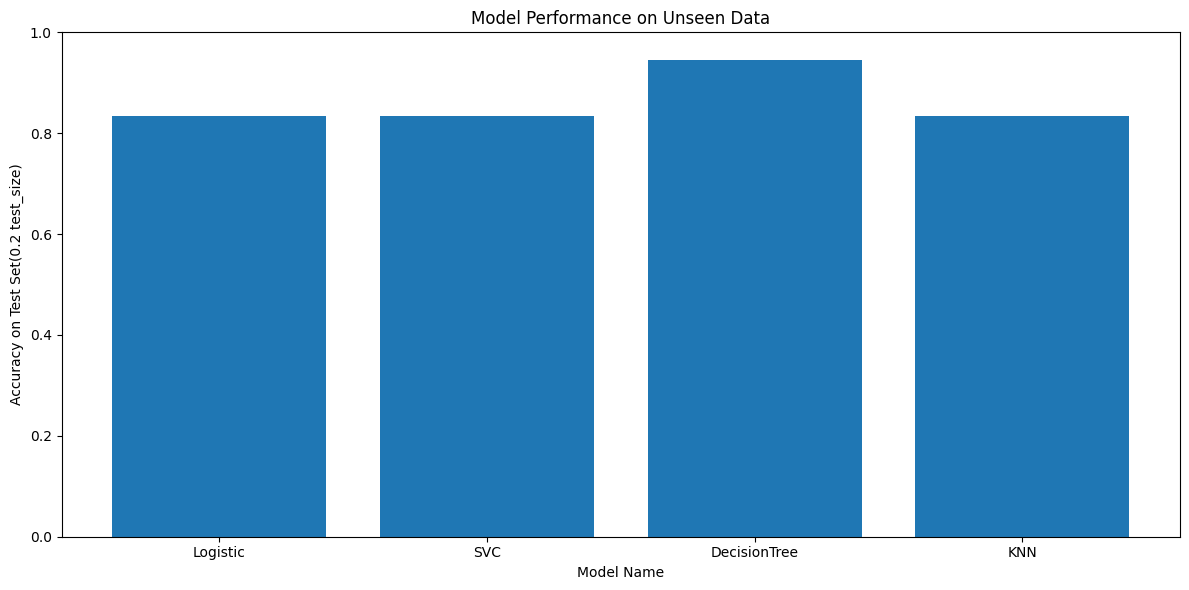

In [33]:
scores=[logReg_score, svm_score, tree_score, knn_score]
xticks=['Logistic', 'SVC', 'DecisionTree', 'KNN']
plt.figure(figsize=(12,6))
plt.bar(xticks, scores)   # xticks = labels, scores = bar heights
plt.xlabel('Model Name')
plt.ylabel('Accuracy on Test Set(0.2 test_size)')
plt.title("Model Performance on Unseen Data")
plt.ylim(0, 1)  # because scores are between 0 and 1
plt.tight_layout()
plt.show()

The first time I ran the code in the notebook, I had not assigned a random state to any of the models and had gotten the exact same test set accuracy score(0.833) and confusion matrix for each of the models.

According to the above analysis, the DecisionTree model(0.944 test accuracy) outperforms all the other modelling approaches which have the same accuracy score(0.833 test accuracy) on the test set and the same confusion matrix. The model performance is partly based on the hyperparameters tested and random state chosen: when I had first run the cells I had not assigned a random_state and I got varying results for the Decision Tree approach(the other models' performance seemed to always be around the same but with DecisionTree it was sometimes lower than others, sometimes comparable and in this case with random_state=42, it is higher. I chose a random_state to keep results reproducible and happened to stumble upon one where DecisionTree is the best performer). 

Since I chose to assign a random_state value when I reached close to the bottom of this notebook, I performed additional analysis in order to find a better performing model because on my first run I had all models with the exact same accuracy on test set(0.833) and same confusion matrix. This additional analysis is presented below and is "extra" in terms of this Coursera course.

At this stage of the analysis, the DecisionTree approach seems the most appealing since it performs well on the test_set so we might pick this as "the best approach". 

However, upon further analysis (done previously before setting the random_state and in the extra section below), we can see that it is not very consistent and has varying performance. Taking into consideration all of the different iterations of models and their accuracies, I would probably choose Logistic Regression since it is efficient, robust and consistent without sacrificing accuracy. 

------------------

------------------

# Extra

I will now add more hyperparameters to test

tuned hyperparameters :(best parameters found)  {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.8607142857142855
0.8333333333333334


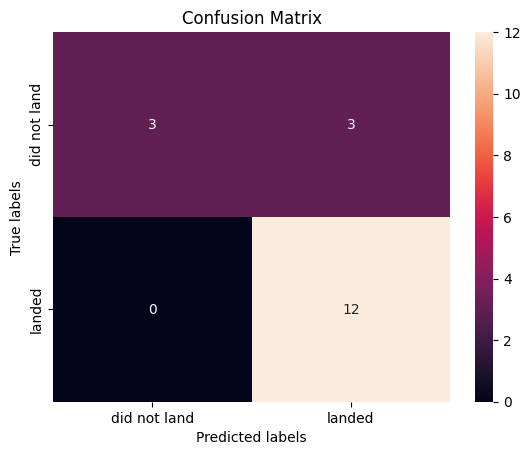

In [34]:
parameters = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}, 
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}
]
lr=LogisticRegression(max_iter=5000, random_state=42)
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring='accuracy')
logreg_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
best_lr=logreg_cv.best_estimator_
print(best_lr.score(X_test, Y_test))
yhat=best_lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'C': 0.01, 'class_weight': None, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8625
0.8333333333333334


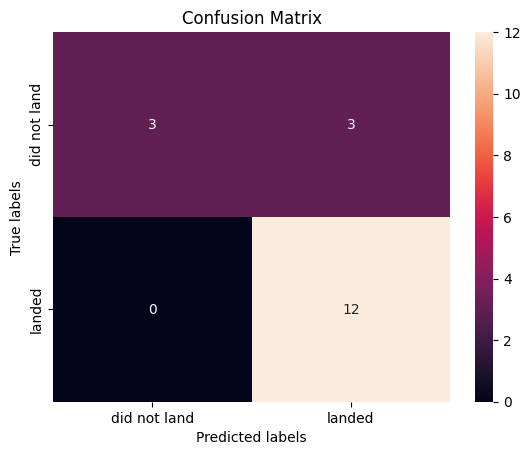

In [35]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 7), 
              'gamma':np.logspace(-3, 3, 7),
              'class_weight': [None, 'balanced']}
svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10, scoring='accuracy')
svm_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
best_svm=svm_cv.best_estimator_
print(best_svm.score(X_test, Y_test))
yhat=best_svm.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8857142857142856
0.8888888888888888


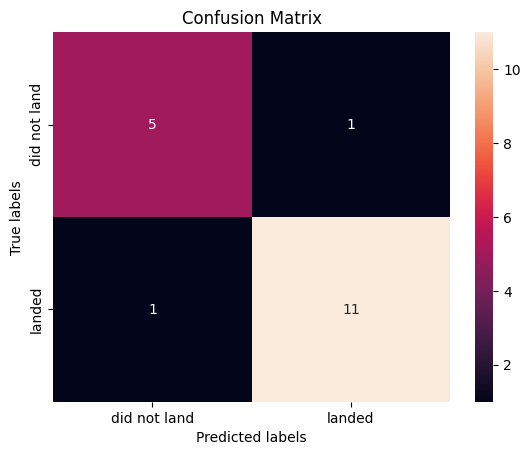

In [36]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'class_weight': [None, 'balanced'],
     'max_leaf_nodes': [None, 10, 20, 50]
}


tree = DecisionTreeClassifier(random_state=42)
tree_cv=GridSearchCV(tree, param_grid=parameters, cv=10, scoring='accuracy')
tree_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
best_tree=tree_cv.best_estimator_
print(best_tree.score(X_test, Y_test))
yhat=best_tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
accuracy : 0.8482142857142858
0.8333333333333334


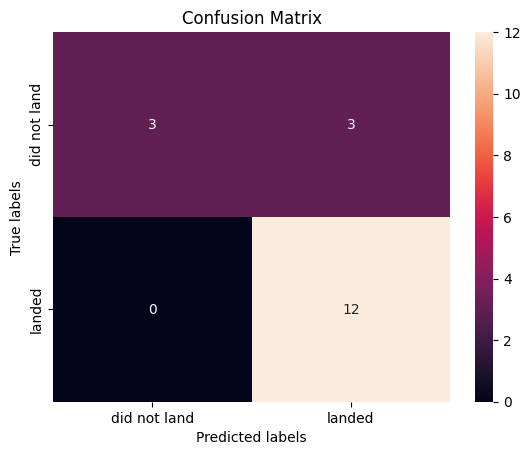

In [37]:
parameters = {'n_neighbors': [n for n in range(1,20)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski', 'chebyshev', 'manhattan']}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=10, scoring='accuracy')
knn_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
best_knn=knn_cv.best_estimator_
print(best_knn.score(X_test, Y_test))
yhat=best_knn.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

-----------------------------------------------------------------------------------
Even after further hyperparameter tuning, most of the models seem to all perform similarly on the test set, with Decision Tree slightly ahead(However, the Decision Tree approach seems to be somewhat unstable as the test accuracy was lagging behind earlier before I specified a random_state). It is difficult at this stage to conclude which model may perform the best moving forward. The test set only includes 18 values. I will now try to change the size of the split for the test set to include 30% of values instead of 20 and rerun the experiments and also use stratified kfold cross validation.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [39]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tuned hyperparameters :(best parameters found)  {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.8690476190476192
0.8148148148148148


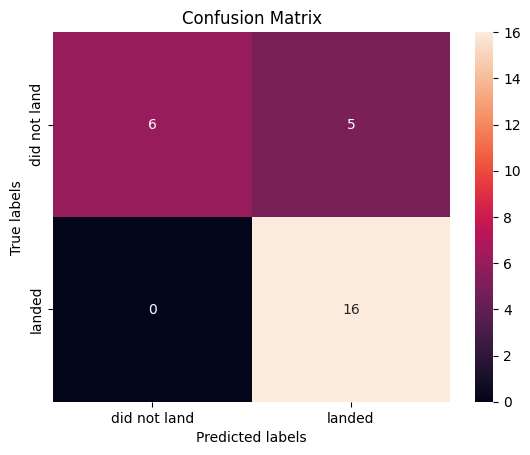

In [40]:
parameters = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}, 
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}
]
lr=LogisticRegression(max_iter=5000, random_state=42)
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
best_lr=logreg_cv.best_estimator_
print(best_lr.score(X_test, Y_test))
yhat=best_lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'C': 1.0, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.8857142857142858
0.8148148148148148


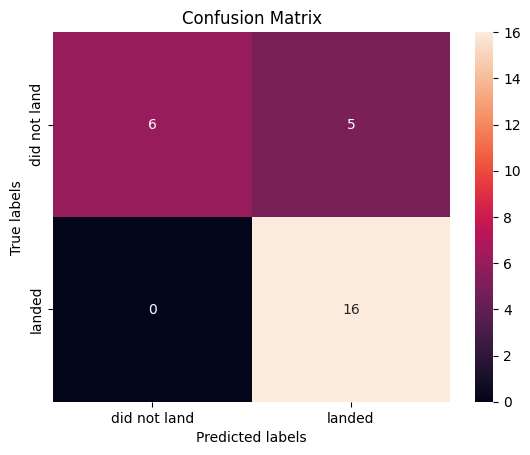

In [41]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 7), 
              'gamma':np.logspace(-3, 3, 7),
              'class_weight': [None, 'balanced']}
svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
best_svm=svm_cv.best_estimator_
print(best_svm.score(X_test, Y_test))
yhat=best_svm.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8857142857142858
0.8148148148148148


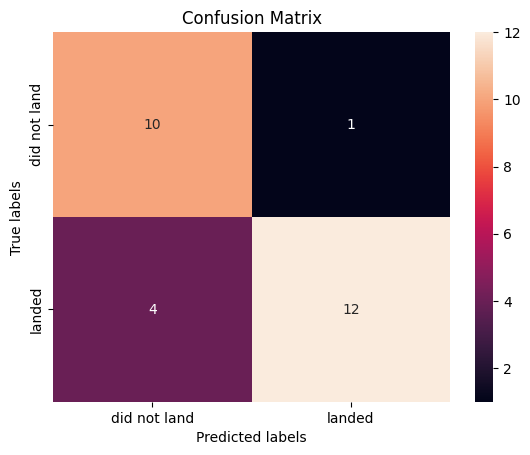

In [42]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'class_weight': [None, 'balanced'],
     'max_leaf_nodes': [None, 10, 20, 50]
}

tree = DecisionTreeClassifier(random_state=42)
tree_cv=GridSearchCV(tree, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
tree_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
best_tree=tree_cv.best_estimator_
print(best_tree.score(X_test, Y_test))
yhat=best_tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
accuracy : 0.869047619047619
0.8148148148148148


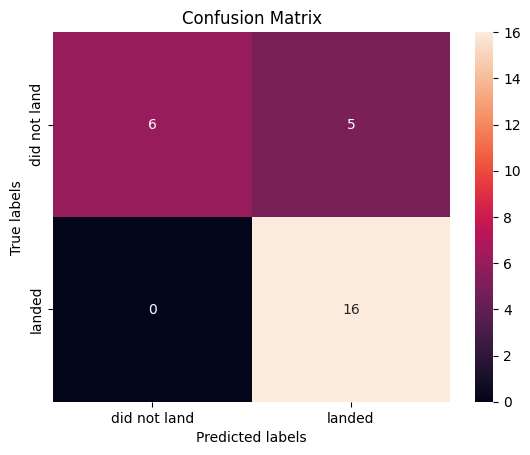

In [43]:
parameters = {'n_neighbors': [n for n in range(1,20)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski', 'chebyshev', 'manhattan']}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=cv, scoring='accuracy')
knn_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
best_knn=knn_cv.best_estimator_
print(best_knn.score(X_test, Y_test))
yhat=best_knn.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

We still do not have a definitive answer. We can consider moving forward with Feature engineering and dimensionality reduction. Once we have determined some relevant features, we can rerun the experiment with the updated X values and try to improve model performance.

For feature engineering, I will compare the coefficients of the features found by the logistic regression model using L1 Regularization, since L1 regularization can reduce coefficients to close to 0 better than other approaches. I will also plot the coefficients found by some of the other hyperparameter optimized approaches and see if the results are somehwat consistent. Using this plot, we will then select features and rerun the GridSearches in order to find the true best performing model

In [44]:
best_lr=logreg_cv.best_estimator_
logReg_coef= best_lr.coef_.ravel()
logReg_coef

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Here, we can see that the best estimator of the GridSearch using logistic regression with l1 regularization has assigned non zero coefficients to only 4 features out of 83. That is quite interesting, let me now visualize the coefficients on a plot using the coefs.

In [45]:
X_axis = np.arange(len(logReg_coef))
X_labels = np.arange(min(X_axis), max(X_axis)+1)
print(X_axis)
print(X_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]


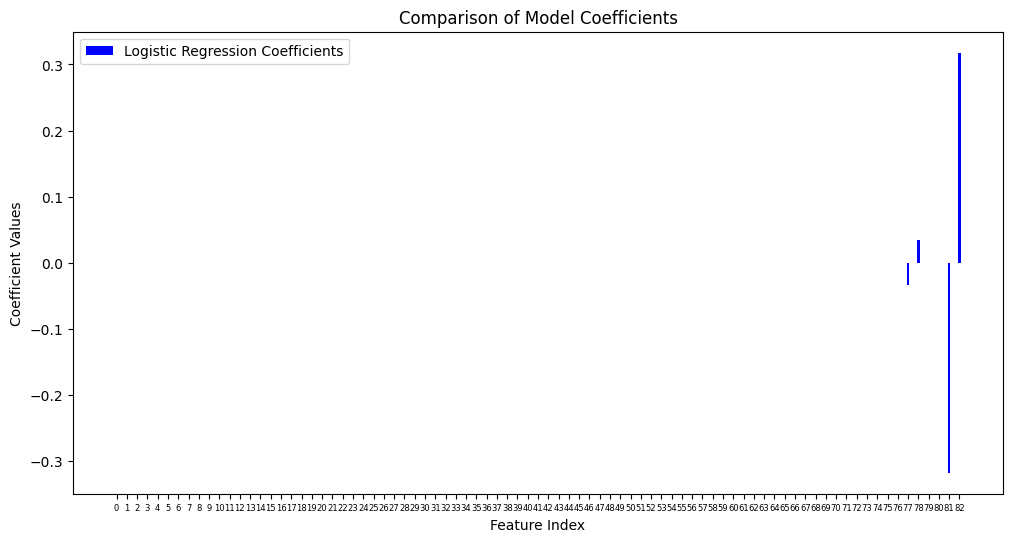

In [46]:
plt.figure(figsize=(12,6))
plt.bar(X_axis, logReg_coef, width=0.25, label="Logistic Regression Coefficients", color='blue')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Values")
plt.title("Comparison of Model Coefficients")
plt.xticks(X_labels)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.legend()
plt.show()

In [47]:
feature_importances = pd.DataFrame({"Lasso Coefficients" :logReg_coef})
feature_importances['Feature Selected'] = feature_importances['Lasso Coefficients'].abs()>0
print("Features identified as important by Lasso Regularization in the Logistic Regression Model:")
display(feature_importances[feature_importances['Feature Selected']])

Features identified as important by Lasso Regularization in the Logistic Regression Model:


,Lasso Coefficients,Feature Selected
77,-0.033646,True
78,0.033646,True
81,-0.317704,True
82,0.317704,True


In [48]:
imp_features = feature_importances[feature_importances['Feature Selected']].index
imp_features

Index([77, 78, 81, 82], dtype='int64')

In [49]:
X_filtered = X[:, imp_features]
print(X_filtered.shape, X_filtered)

(90, 4) [[ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869 -0.51730613  0.51730613]
 [ 1.87082869 -1.87082869 -0.51730613  0.51730613]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [ 1.87082869 -1.87082869  1.93309133 -1.93309133]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.53452248 -0.51730613  0.51730613]
 [-0.53452248  0.534522

Now, we will retrain each of the models and try to find a best performer with the relevant features identified by lasso regularization

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y, test_size=0.2, random_state=2)

In [51]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tuned hyperparameters :(best parameters found)  {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Set accuracy : 0.8767857142857143
Test Set accuracy:  0.8333333333333334


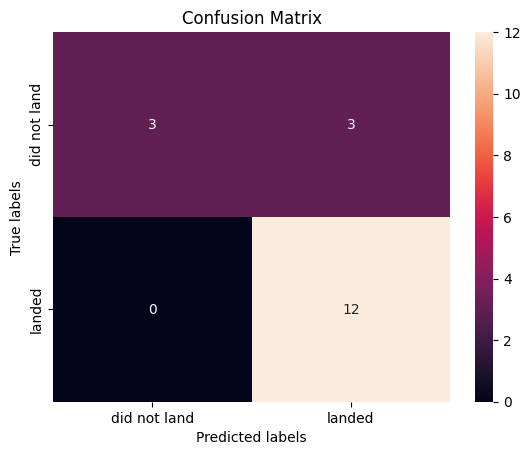

In [52]:
parameters = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}, 
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}
]
lr=LogisticRegression(max_iter=5000, random_state=42)
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",logreg_cv.best_params_)
print("Training Set accuracy :",logreg_cv.best_score_)
best_lr=logreg_cv.best_estimator_
print("Test Set accuracy: ",best_lr.score(X_test, Y_test))
logReg_score=best_lr.score(X_test, Y_test)
yhat=best_lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'C': 0.001, 'class_weight': None, 'coef0': 0.0, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'shrinking': True}
Training Set accuracy : 0.8767857142857143
Test Set accuracy:  0.8333333333333334


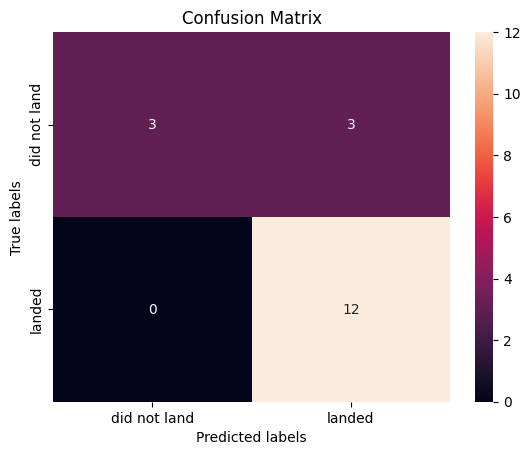

In [53]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 7), 
              'gamma':['scale', 'auto', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.1, 0.5, 1.0],
              'shrinking': [True, False],
              'class_weight': [None, 'balanced']}

svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",svm_cv.best_params_)
print("Training Set accuracy :",svm_cv.best_score_)
best_svm=svm_cv.best_estimator_
print("Test Set accuracy: ",best_svm.score(X_test, Y_test))
svm_score=best_svm.score(X_test, Y_test)
yhat=best_svm.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Training Set accuracy : 0.8642857142857142
Test Set accuracy:  0.8333333333333334


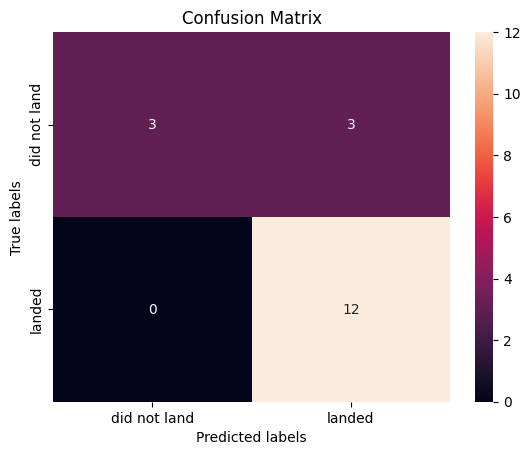

In [54]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'class_weight': [None, 'balanced'],
     'max_leaf_nodes': [None, 10, 20, 50]
}

tree = DecisionTreeClassifier(random_state=42)
tree_cv=GridSearchCV(tree, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
tree_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",tree_cv.best_params_)
print("Training Set accuracy :",tree_cv.best_score_)
best_tree=tree_cv.best_estimator_
print("Test Set accuracy: ",best_tree.score(X_test, Y_test))
tree_score=best_tree.score(X_test, Y_test)
yhat=best_tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hyperparameters :(best parameters found)  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Set accuracy : 0.8642857142857142
Test Set accuracy:  0.8333333333333334


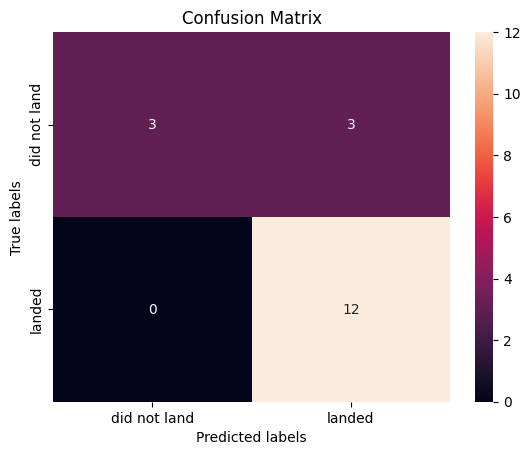

In [55]:
parameters = {'n_neighbors': [n for n in range(1,20)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski', 'chebyshev', 'manhattan']}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=cv, scoring='accuracy')
knn_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",knn_cv.best_params_)
print("Training Set accuracy :",knn_cv.best_score_)
best_knn=knn_cv.best_estimator_
print("Test Set accuracy: ",best_knn.score(X_test, Y_test))
knn_score=best_knn.score(X_test, Y_test)
yhat=best_knn.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Interestingly, all the tested models seem to have similar test set performance with a test accuracy of approximately 83.3% even after hyperparameter tuning and feature engineering(done using GridSearch and L1 Regularization respectively). To further distinguish/improve the performance of the models, we could benefit from incorporating some additional feature engineering methods, using domain expertise (for example, getting the opinion of an engineer working on these launches about what factors/features to consider) and by collecting and using more data for the training and testing of the models. Currently, the model's have equivalent performance with the same test set accuracy and confusion matrix values.

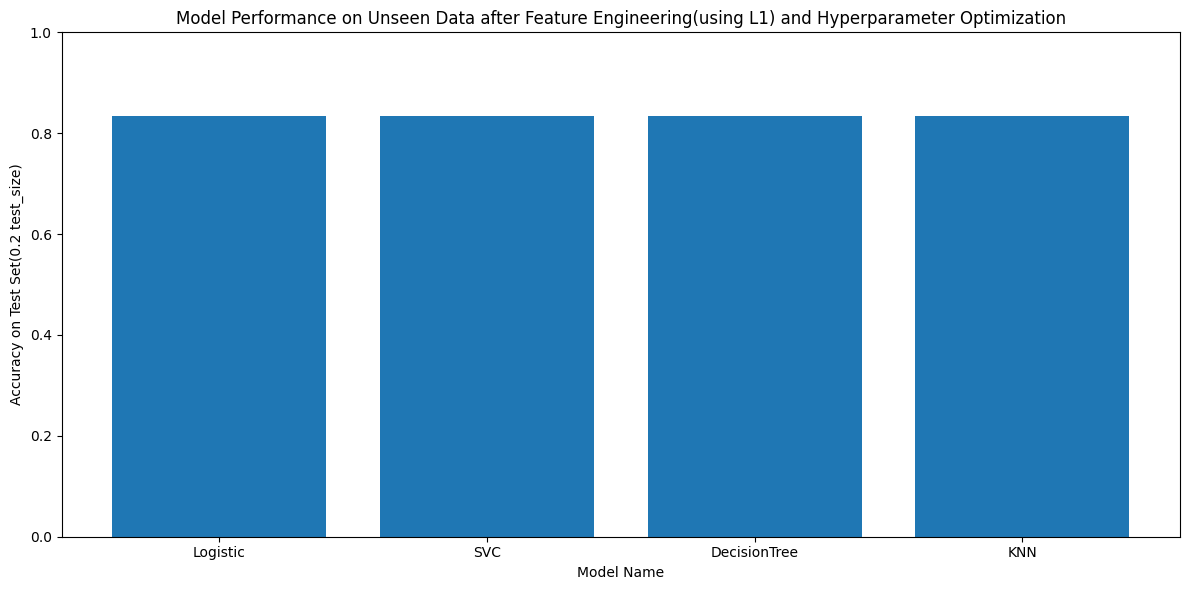

In [56]:
scores=[logReg_score, svm_score, tree_score, knn_score]
xticks=['Logistic', 'SVC', 'DecisionTree', 'KNN']
plt.figure(figsize=(12,6))
plt.bar(xticks, scores)   # xticks = labels, scores = bar heights
plt.xlabel('Model Name')
plt.ylabel('Accuracy on Test Set(0.2 test_size)')
plt.title("Model Performance on Unseen Data after Feature Engineering(using L1) and Hyperparameter Optimization")
plt.ylim(0, 1)  # because scores are between 0 and 1
plt.tight_layout()
plt.show()

Here We can look deeper into the features that were selected easily by using the original X value and the feature index

In [57]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
Original_X = pd.read_csv(text2)
Original_X.iloc[:,[77, 78, 81, 82]].head(20)

,GridFins_False,GridFins_True,Legs_False,Legs_True
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,1.0
8,1.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0


In [58]:
Original_X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [59]:
Original_X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [60]:
print(Original_X['GridFins_False'].sum())
print(Original_X['GridFins_True'].sum())
print(Original_X['Legs_False'].sum())
print(Original_X['Legs_True'].sum())

20.0
70.0
19.0
71.0


In [61]:
Y= data['Class']

In [62]:
(Original_X['Legs_False']==1 & (Y == 1)).sum()

13

In [63]:
(Original_X['GridFins_False']==1 & (Y == 1)).sum()

14

In [64]:
(Original_X['Reused_True']==1 & (Y == 1)).sum()

51

----------
During the EDA and Dashboarding sections of this project, we saw that payload mass and chosen orbit are likely relevant features. The chosen launch site could also be taken into consideration. Additionally, the Gridfins_True and Gridfins_False are redundant features similar to Legs_False + Legs_True and Reused_True + Reused_False so we will only include one of each of these pairs. We could also include FlightNumber as the newer flights tend to have a higher success rate however this would likely not be useful information to include in the modelling process because, I believe, it would practically not make much sense for the model to consider features like this for making decisions about the next mission using the prediction of the next mission's success rate.

In [65]:
X = Original_X[['PayloadMass',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'GridFins_True','Reused_True', 'Legs_True']]

In [66]:
Y=Y.to_numpy()

In [67]:
X

,PayloadMass,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,GridFins_True,Reused_True,Legs_True
0,6104.959412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,525.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,677.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3170.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
86,15400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
87,15400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
88,15400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [68]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)

We have reduced the size of the original X dataset from 90x83 to 90x18, now let's try running the models again and see if we can find a better performer. I will use a test_size of 0.3 this time.

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [82]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tuned hyperparameters :(best parameters found)  {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Training Set accuracy : 0.8690476190476192
Test Set accuracy:  0.8148148148148148


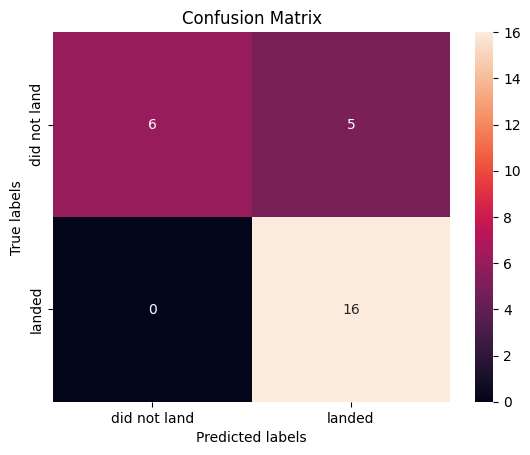

In [83]:
parameters = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}, 
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C':np.logspace(-3, 3, 7), 'class_weight': [None, 'balanced']}
]
lr=LogisticRegression(max_iter=5000, random_state=42)
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",logreg_cv.best_params_)
print("Training Set accuracy :",logreg_cv.best_score_)
best_lr=logreg_cv.best_estimator_
print("Test Set accuracy: ",best_lr.score(X_test, Y_test))
logReg_score=best_lr.score(X_test, Y_test)
yhat=best_lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Fitting 10 folds for each of 2688 candidates, totalling 26880 fits
tuned hyperparameters :(best parameters found)  {'C': 0.01, 'class_weight': None, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
Training Set accuracy : 0.8857142857142858
Test Set accuracy:  0.8148148148148148


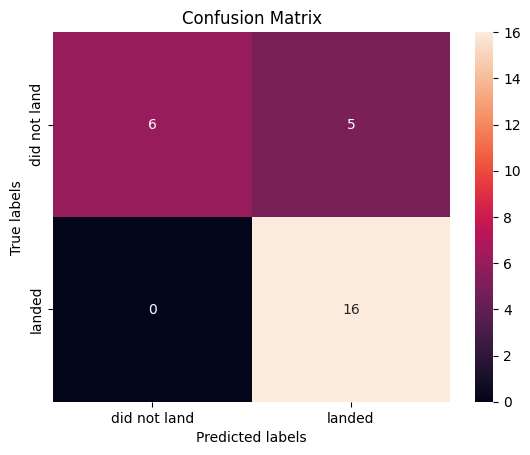

In [84]:
"""
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 7), 
              'gamma':['scale', 'auto', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.1, 0.5, 1.0],
              'shrinking': [True, False],
              'class_weight': [None, 'balanced']}
This parameter set was taking far too long to train since the feature space size has increased significantly, so we reduce the param_grid to 
reduce the total number of combinations required
"""

parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C':np.logspace(-3, 3, 7), 
              'gamma':['scale', 'auto',0.001,0.01,0.1,1],
              'degree': [2, 3],
              'coef0': [0.0, 0.1],
              'shrinking': [True, False],
              'class_weight': [None, 'balanced']}

svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
svm_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",svm_cv.best_params_)
print("Training Set accuracy :",svm_cv.best_score_)
best_svm=svm_cv.best_estimator_
print("Test Set accuracy: ",best_svm.score(X_test, Y_test))
svm_score=best_svm.score(X_test, Y_test)
yhat=best_svm.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits
tuned hyperparameters :(best parameters found)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Training Set accuracy : 0.8690476190476192
Test Set accuracy:  0.8148148148148148


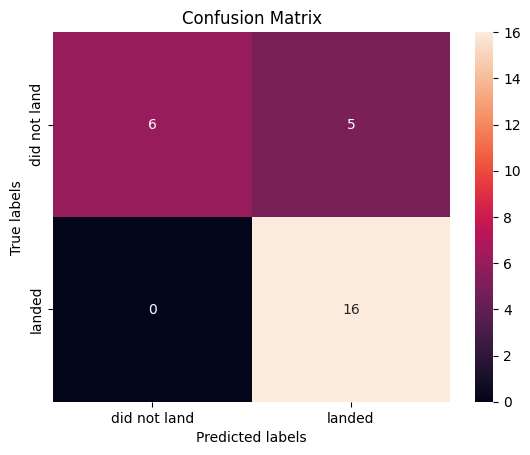

In [85]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'class_weight': [None, 'balanced'],
     'max_leaf_nodes': [None, 10, 20, 50]
}

tree = DecisionTreeClassifier(random_state=42)
tree_cv=GridSearchCV(tree, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
tree_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",tree_cv.best_params_)
print("Training Set accuracy :",tree_cv.best_score_)
best_tree=tree_cv.best_estimator_
print("Test Set accuracy: ",best_tree.score(X_test, Y_test))
tree_score=best_tree.score(X_test, Y_test)
yhat=best_tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits
tuned hyperparameters :(best parameters found)  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Training Set accuracy : 0.8857142857142858
Test Set accuracy:  0.7037037037037037


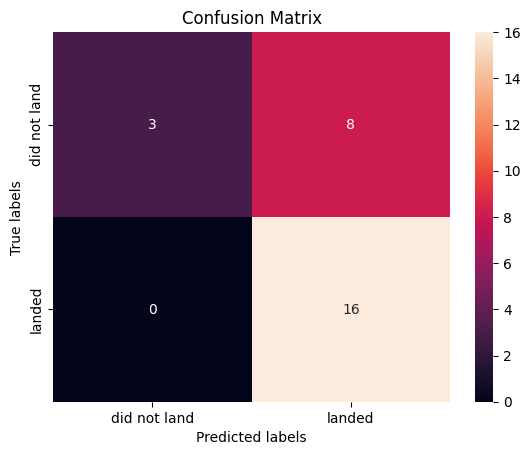

In [86]:
parameters = {'n_neighbors': [n for n in range(1,20)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski', 'chebyshev', 'manhattan']}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
knn_cv.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters found) ",knn_cv.best_params_)
print("Training Set accuracy :",knn_cv.best_score_)
best_knn=knn_cv.best_estimator_
print("Test Set accuracy: ",best_knn.score(X_test, Y_test))
knn_score=best_knn.score(X_test, Y_test)
yhat=best_knn.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

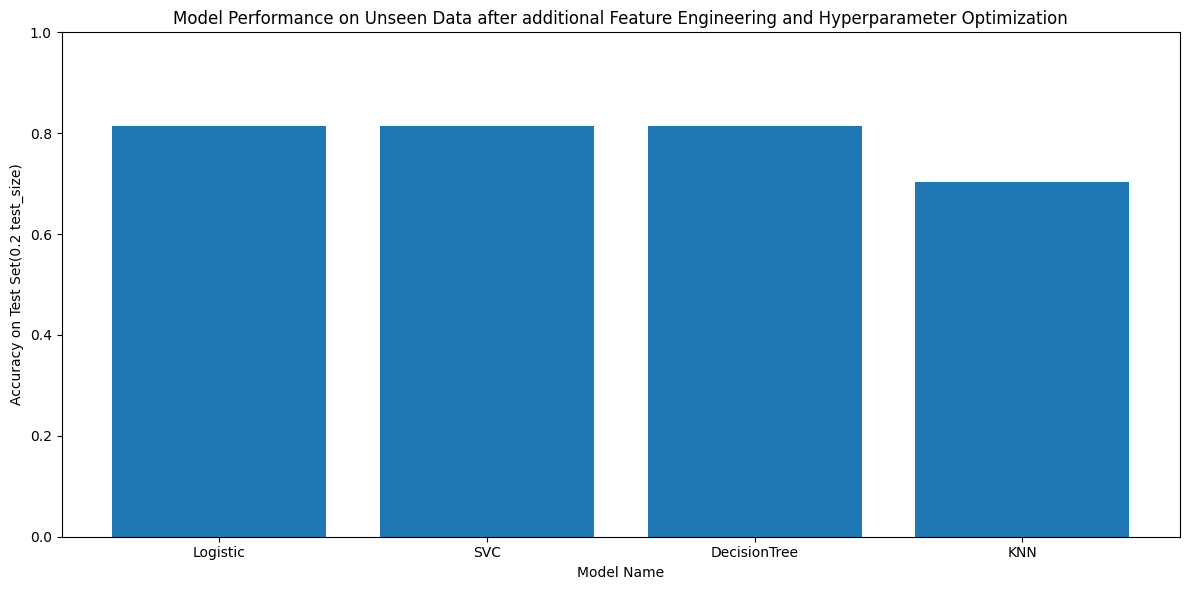

In [87]:
scores=[logReg_score, svm_score, tree_score, knn_score]
xticks=['Logistic', 'SVC', 'DecisionTree', 'KNN']
plt.figure(figsize=(12,6))
plt.bar(xticks, scores)   # xticks = labels, scores = bar heights
plt.xlabel('Model Name')
plt.ylabel('Accuracy on Test Set(0.2 test_size)')
plt.title("Model Performance on Unseen Data after additional Feature Engineering and Hyperparameter Optimization")
plt.ylim(0, 1)  # because scores are between 0 and 1
plt.tight_layout()
plt.show()

In this latest analysis with the newly chosen features, the KNN approach performs the worst on the test set while the others have similar performance. 
If I had to choose a model based on the current state of analysis - I would probably go with Logistic Regression as it is simple yet performs decently consistently. Throughout the course of this analysis, the DecisionTree classifier has had varying performance(sometimes better, sometimes worse, sometimes equal), KNN had consistent performance until this latest run and Logistic and SVC seem to have consistent performance.
More feature engineering could reveal a stronger model in future analysis but for now I would probably choose Logistic Regression because it is simple and seems to have consistent performance without sacrificing accuracy.

Correlation analysis, we could have done this before modelling for some additional insight on what features may be correlated with the target variable.

Y                1.000000e+00
Legs_True        6.738249e-01
GridFins_True    6.425396e-01
ReusedCount      4.665836e-01
Block            4.160149e-01
                     ...     
Serial_B1046     3.812464e-02
Orbit_LEO        2.933573e-02
Orbit_MEO        2.186691e-17
Orbit_PO         1.580996e-17
Serial_B1047     6.605630e-18
Name: Y, Length: 81, dtype: float64


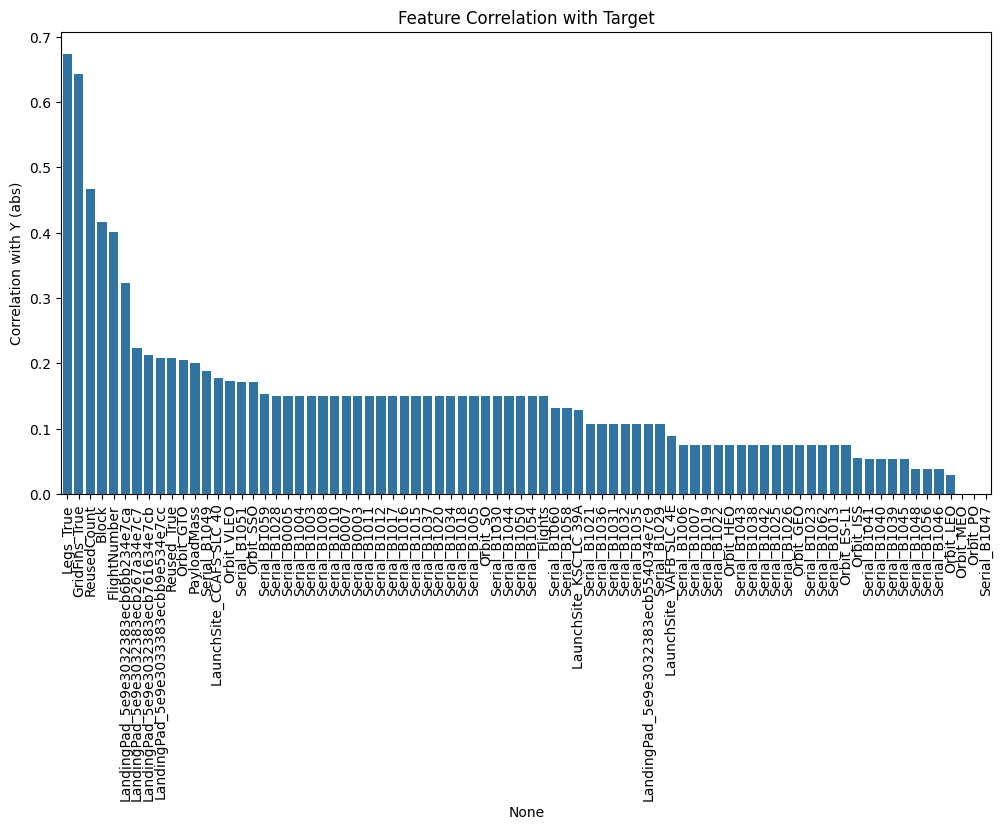

In [88]:
import pandas as pd
Original_X = Original_X.loc[:, ~Original_X.columns.str.endswith('_False')]
df = Original_X.copy()
df['Y'] = pd.Series(Y)  # wrap Y as a pandas Series
correlations = abs(df.corr()['Y']).sort_values(ascending=False)
print(correlations)
feature_correlations = correlations.drop('Y')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=feature_correlations.index, y=feature_correlations.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation with Y (abs)')
plt.title('Feature Correlation with Target')
plt.show()

Based on the above plot, we should potentially consider features like "Block", "ReusedCount" and LandingPads as well. Domain expertise would be very helpful in determining causation Vs correlation

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
